In [2]:
import imageio
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

In [3]:
plt.rcParams['figure.figsize'] = [5.0, 5.0]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1.5

In [4]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p	
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

# Vertical Scan No Space Charge

In [12]:
# Create dd dictionary
dd1 = dict()

dd1 = add_input_file(dd1, '01_NoSC_Tomo_Lattice_V_10/output/output.mat', '6.10')
dd1 = add_input_file(dd1, '01_NoSC_Tomo_Lattice_V_12/output/output.mat', '6.12')
dd1 = add_input_file(dd1, '01_NoSC_Tomo_Lattice_V_14/output/output.mat', '6.14')
dd1 = add_input_file(dd1, '01_NoSC_Tomo_Lattice_V_16/output/output.mat', '6.16')
dd1 = add_input_file(dd1, '01_NoSC_Tomo_Lattice_V_18/output/output.mat', '6.18')
dd1 = add_input_file(dd1, '01_NoSC_Tomo_Lattice_V_20/output/output.mat', '6.20')
dd1 = add_input_file(dd1, '01_NoSC_Tomo_Lattice_V_22/output/output.mat', '6.22')
dd1 = add_input_file(dd1, '01_NoSC_Tomo_Lattice_V_24/output/output.mat', '6.24')

save_folder = 'Plots_01'
sc = 'NoSC'
Case = 'V_noSC'
legend_label = r'Q$_y$'    
main_label = 'Full_Scan'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 2200
zoom_turns = 15
turns = [0, 1, 10, 50, 100, 874, 2185, 2199]
betagamma = 2.492104532 * 0.9159915293879255

	Added output data from  01_NoSC_Tomo_Lattice_V_10/output/output.mat 	 dictionary key:  6.10
	Added output data from  01_NoSC_Tomo_Lattice_V_12/output/output.mat 	 dictionary key:  6.12
	Added output data from  01_NoSC_Tomo_Lattice_V_14/output/output.mat 	 dictionary key:  6.14
	Added output data from  01_NoSC_Tomo_Lattice_V_16/output/output.mat 	 dictionary key:  6.16
	Added output data from  01_NoSC_Tomo_Lattice_V_18/output/output.mat 	 dictionary key:  6.18
	Added output data from  01_NoSC_Tomo_Lattice_V_20/output/output.mat 	 dictionary key:  6.20
	Added output data from  01_NoSC_Tomo_Lattice_V_22/output/output.mat 	 dictionary key:  6.22
	Added output data from  01_NoSC_Tomo_Lattice_V_24/output/output.mat 	 dictionary key:  6.24


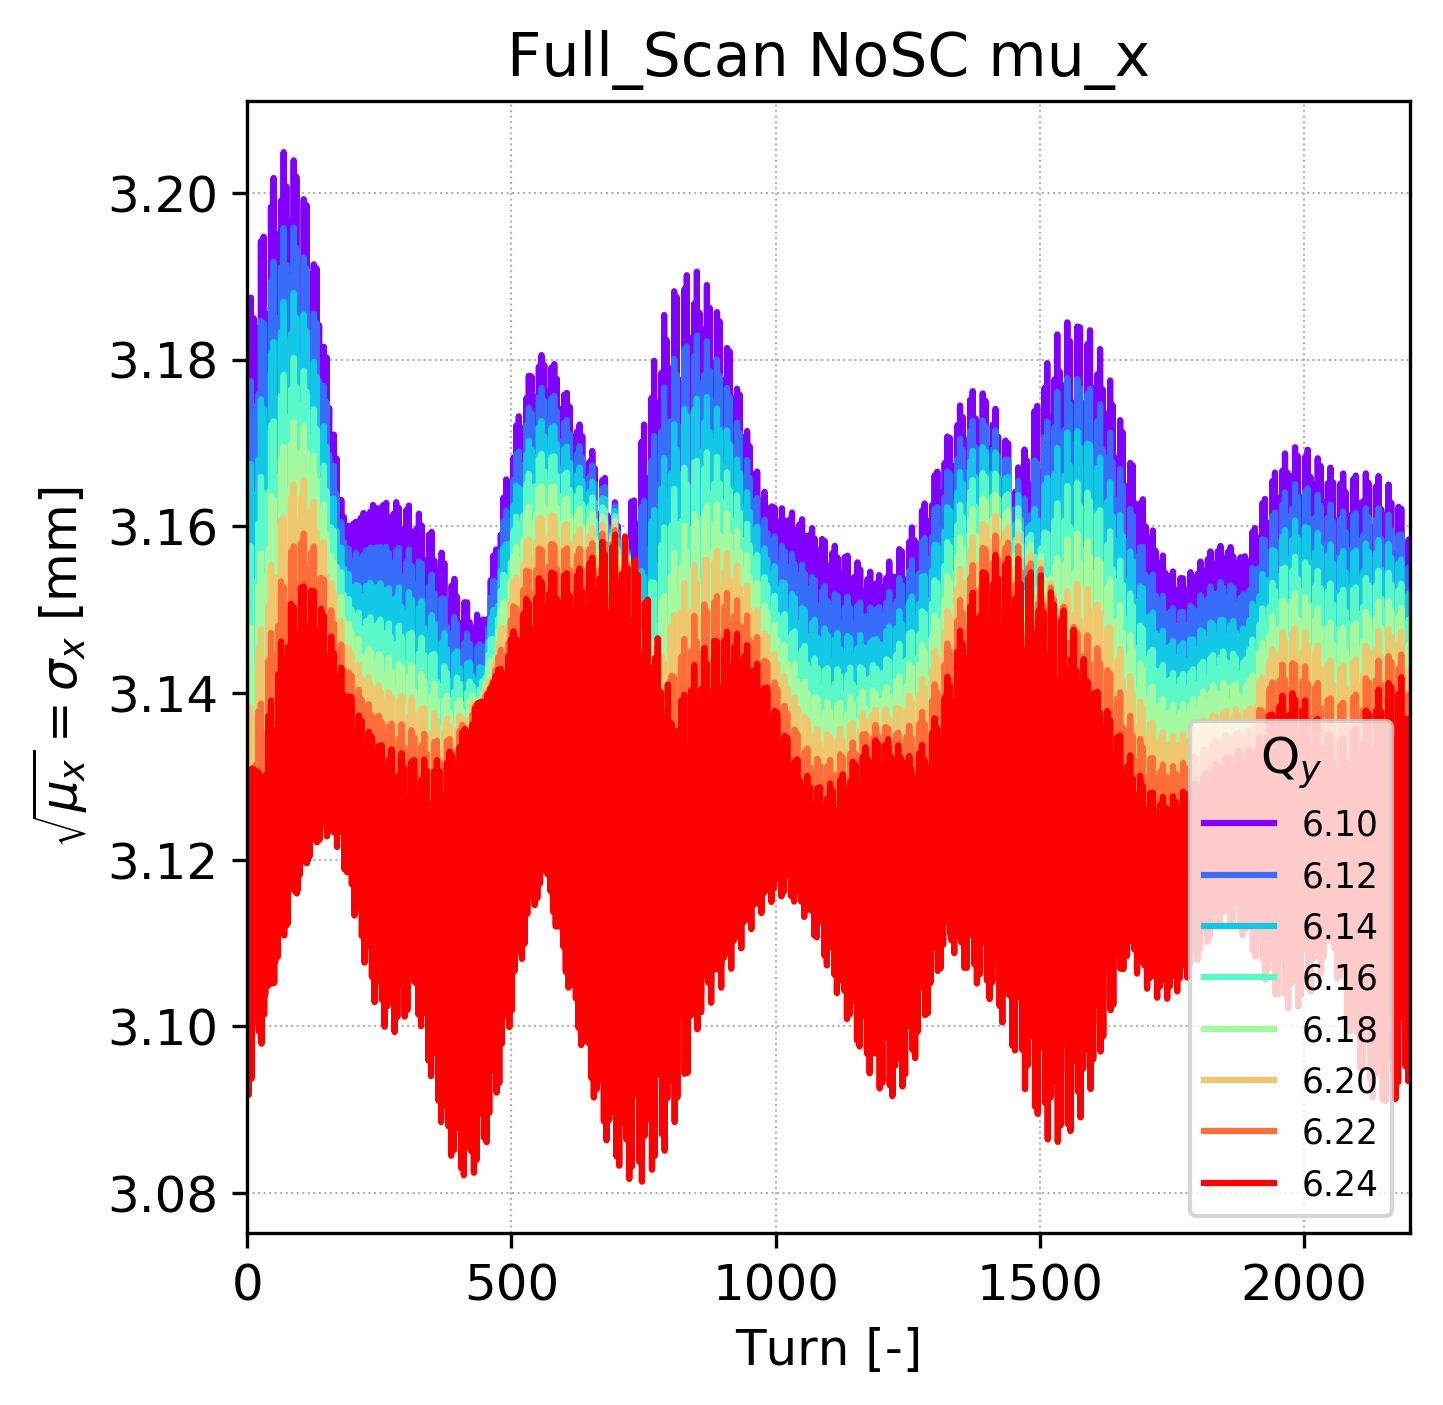

In [13]:
parameter = 'mu_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sqrt{\mu_x} = \sigma_x$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0]+1, np.sqrt(dd1[key][parameter][0])*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid(ls=':', lw=0.5)
ax1.set_xlim(0,turn_tot);

parameter = 'sigma_x'
savename = save_folder + '/' + Case + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

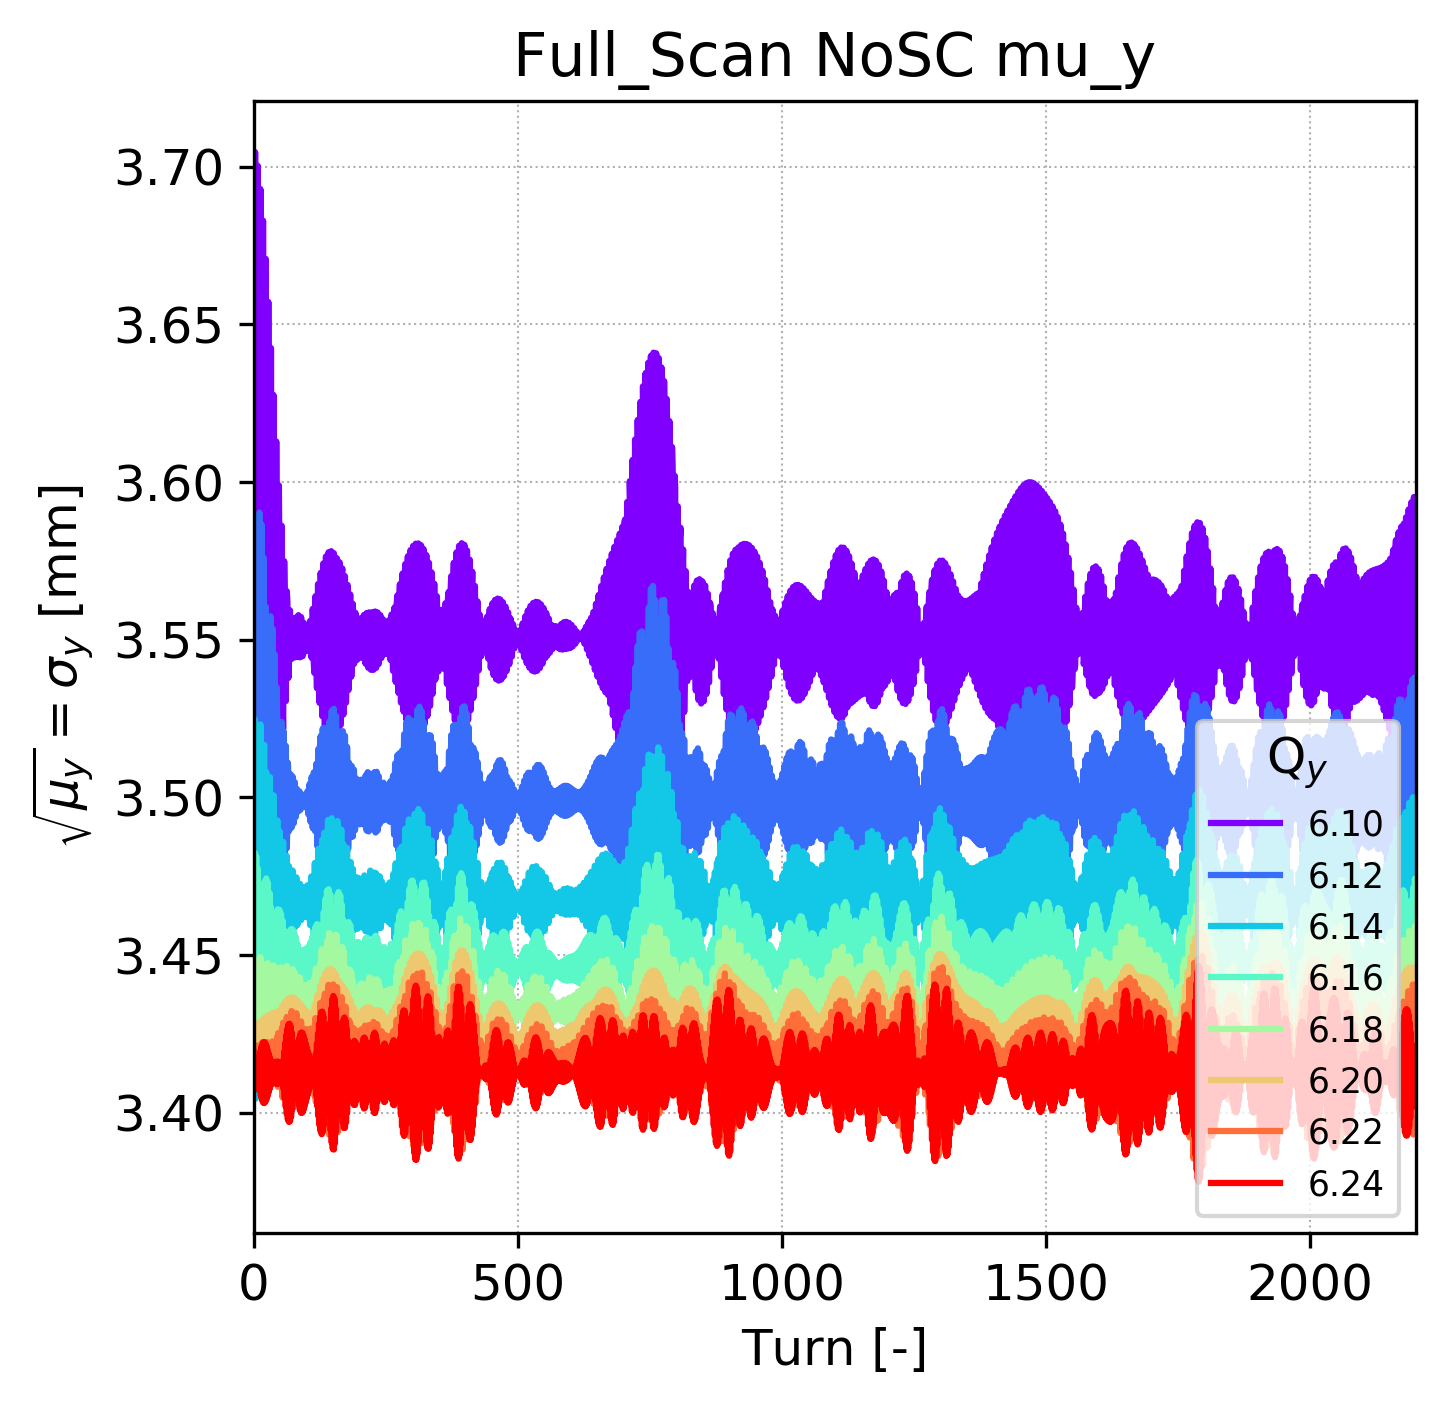

In [15]:
parameter = 'mu_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sqrt{\mu_y} = \sigma_y$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0]+1, np.sqrt(dd1[key][parameter][0])*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid(ls=':', lw=0.5)
ax1.set_xlim(0,turn_tot);

parameter = 'sigma_y'
savename = save_folder + '/' + Case + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

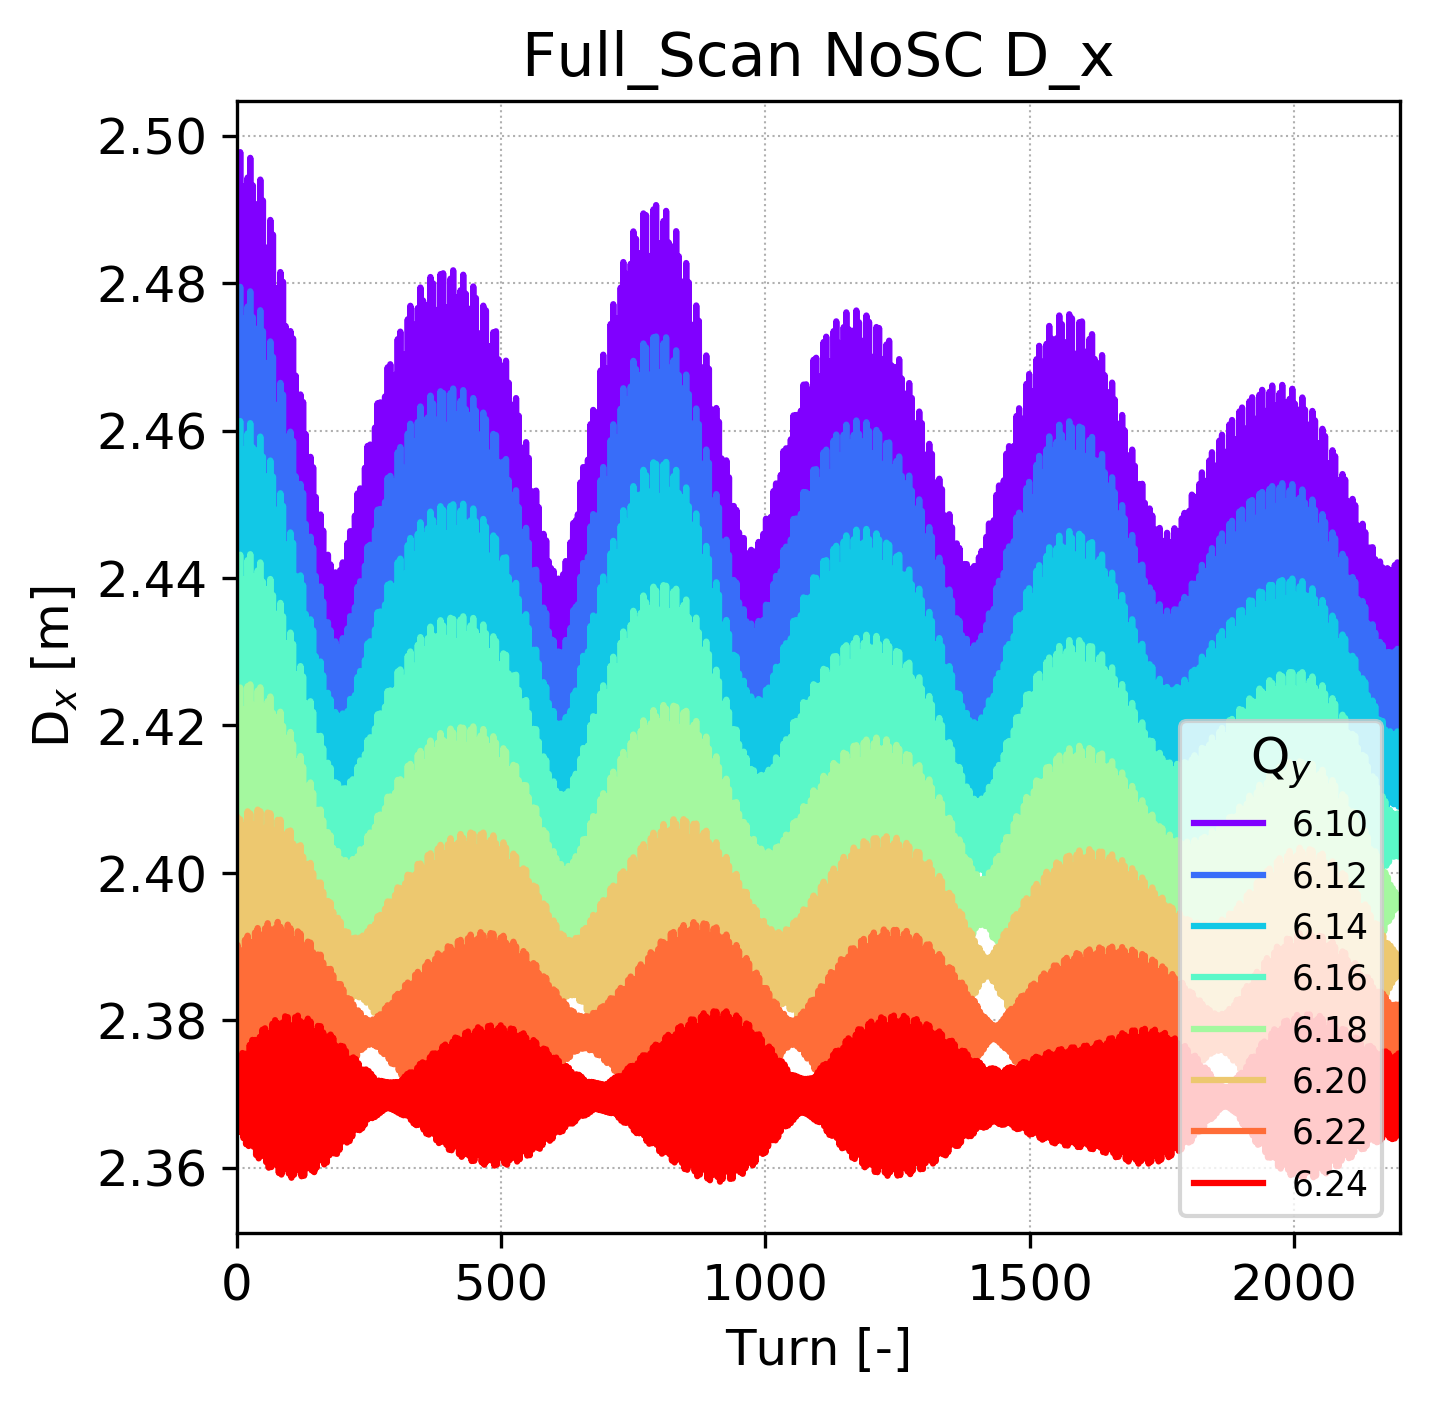

In [16]:
parameter = 'D_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'D$_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid(ls=':', lw=0.5)
ax1.set_xlim(0,turn_tot);

savename = save_folder + '/' + Case + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

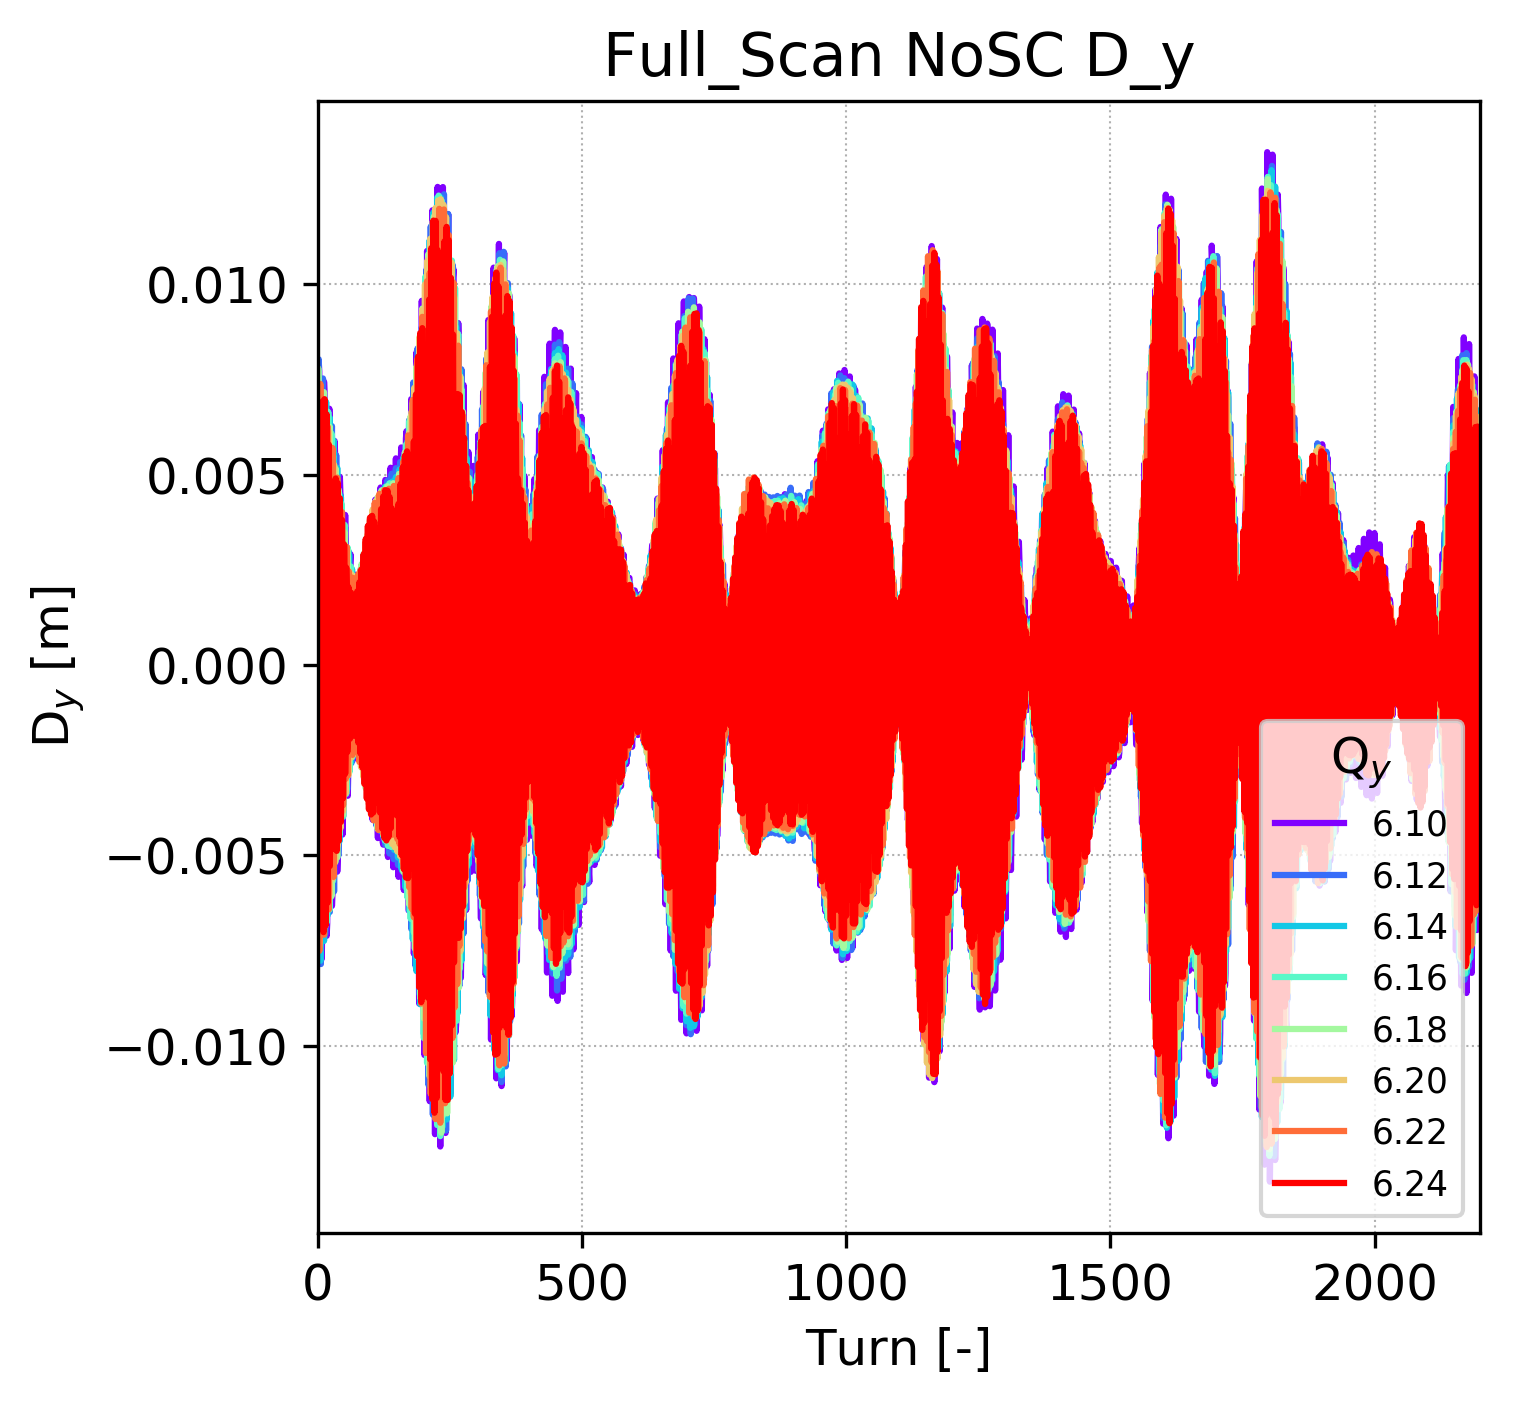

In [17]:
parameter = 'D_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'D$_y$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid(ls=':', lw=0.5)
ax1.set_xlim(0,turn_tot);

savename = save_folder + '/' + Case + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

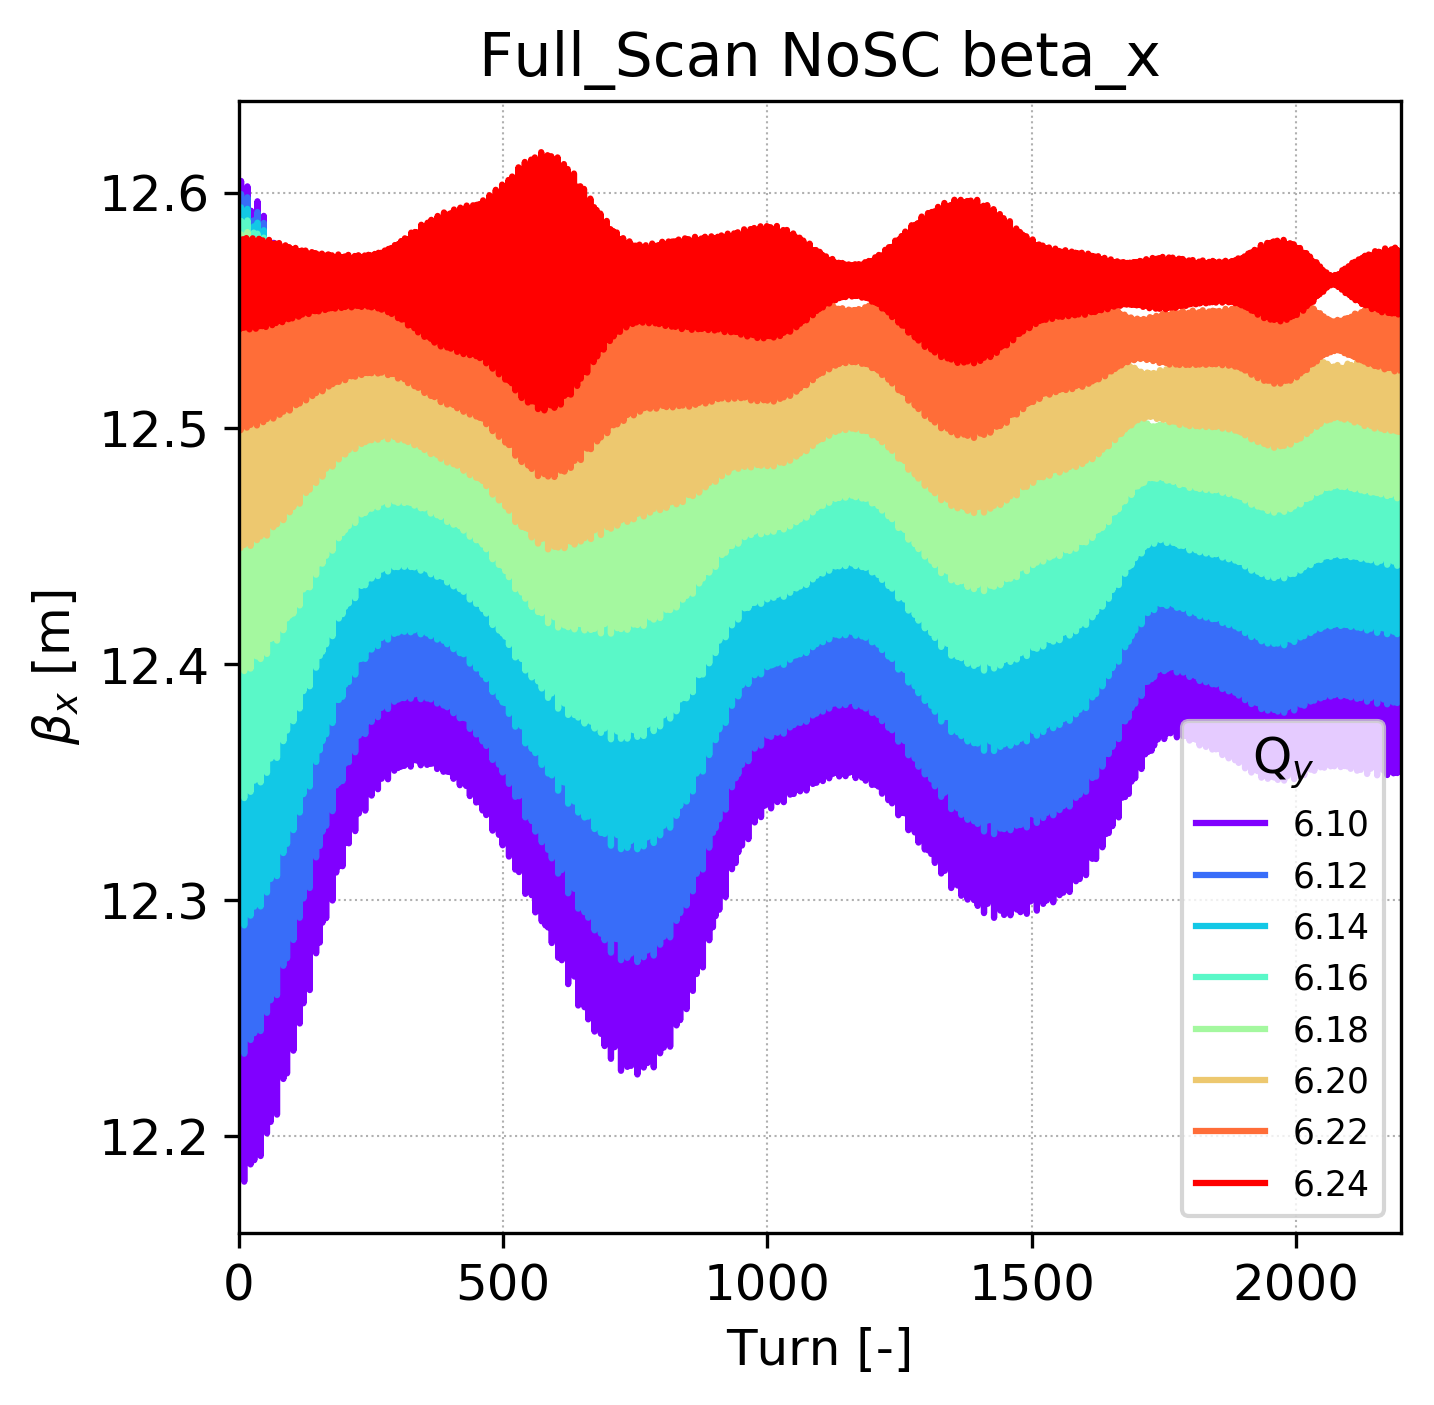

In [18]:
parameter = 'beta_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1

ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid(ls=':', lw=0.5)
ax1.set_xlim(0,turn_tot);

savename = save_folder + '/' + Case + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

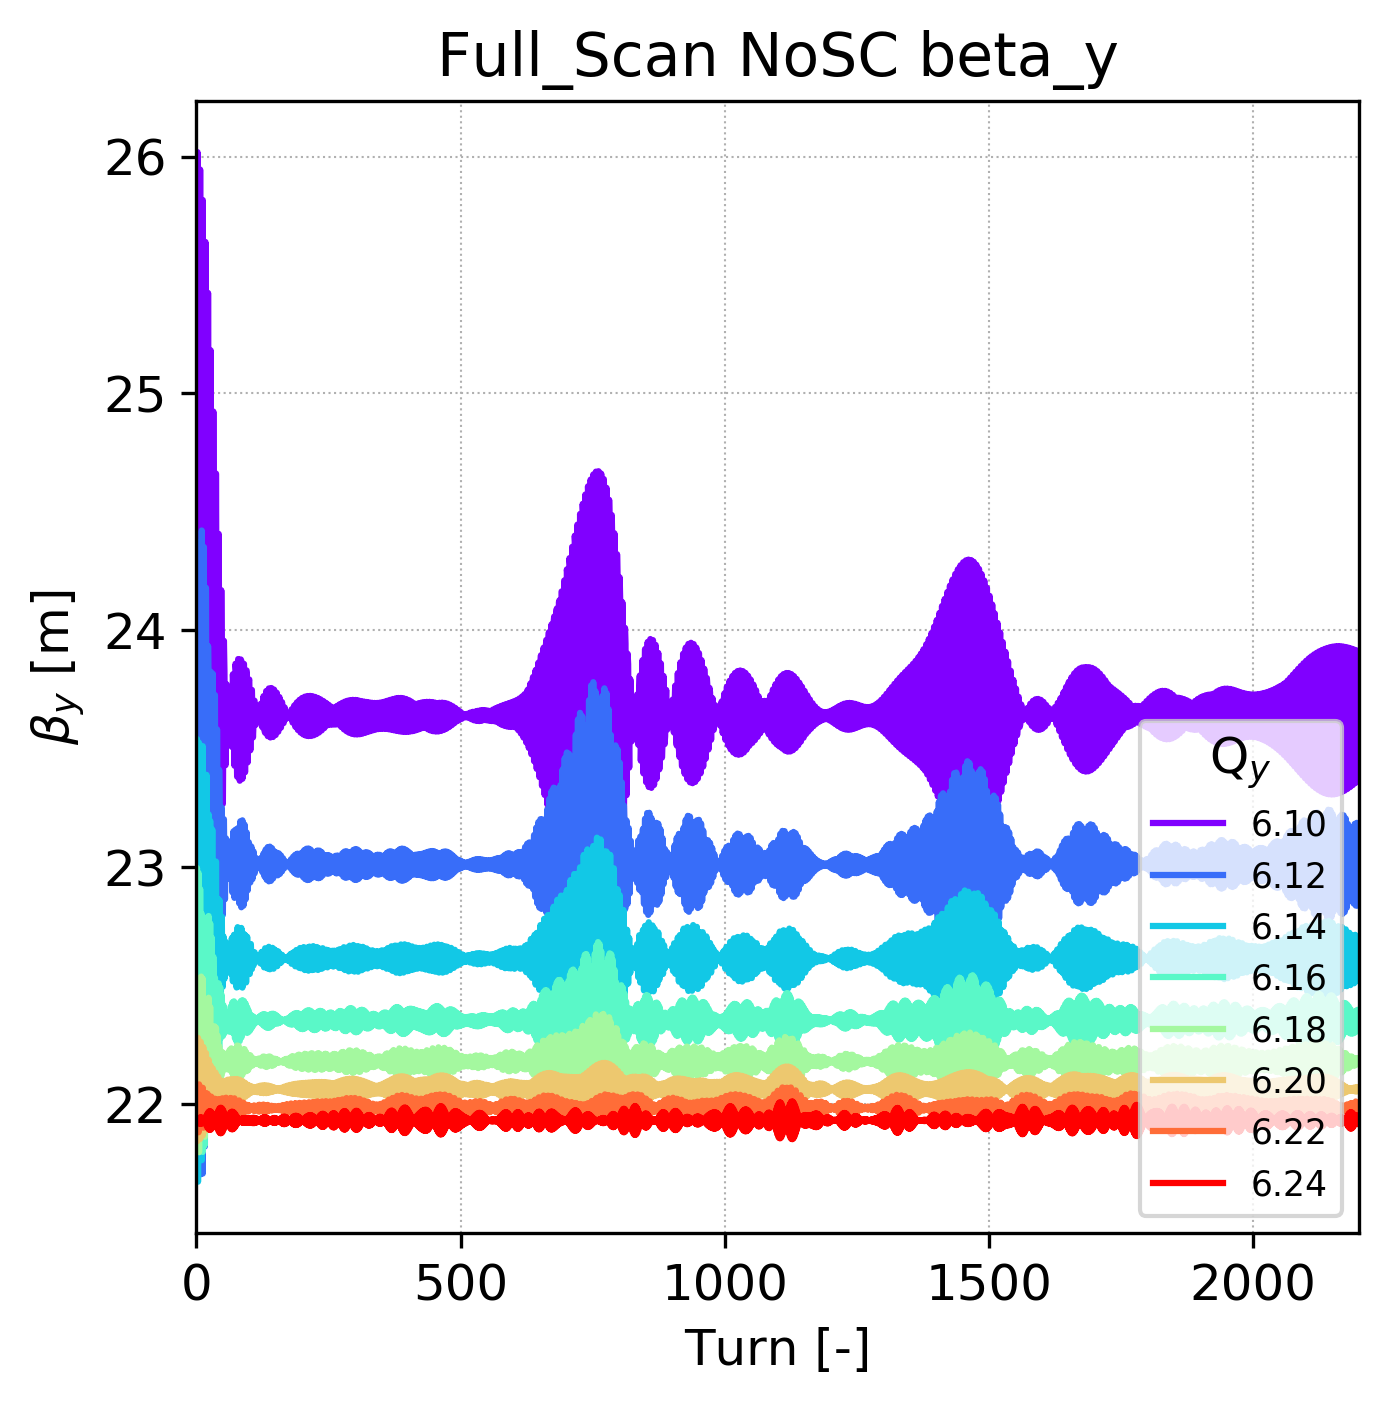

In [19]:
parameter = 'beta_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_y$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1

ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid(ls=':', lw=0.5)
ax1.set_xlim(0,turn_tot);

savename = save_folder + '/' + Case + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

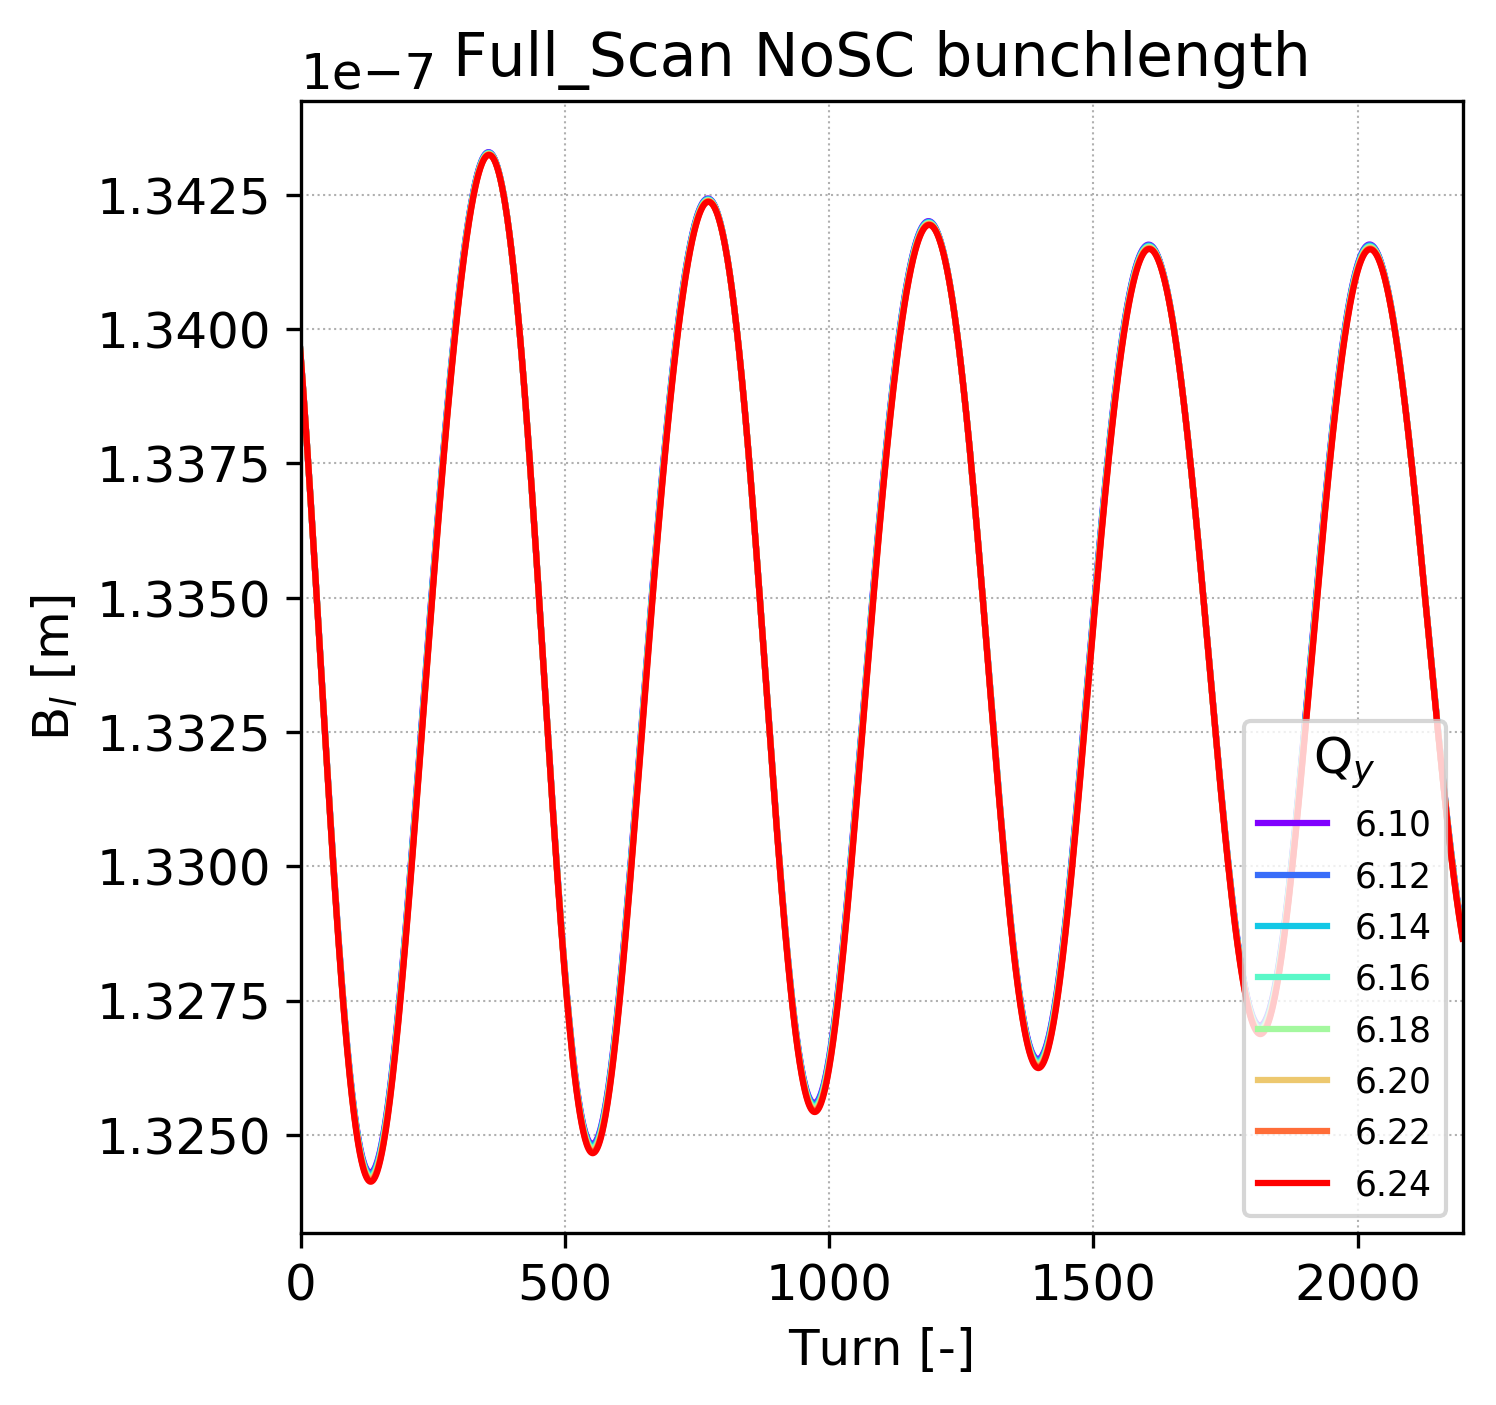

In [20]:
parameter = 'bunchlength'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'B$_l$ [m]');
ax1.set_xlabel('Turn [-]');


colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1

ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid(ls=':', lw=0.5)
ax1.set_xlim(0,turn_tot);

savename = save_folder + '/' + Case + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

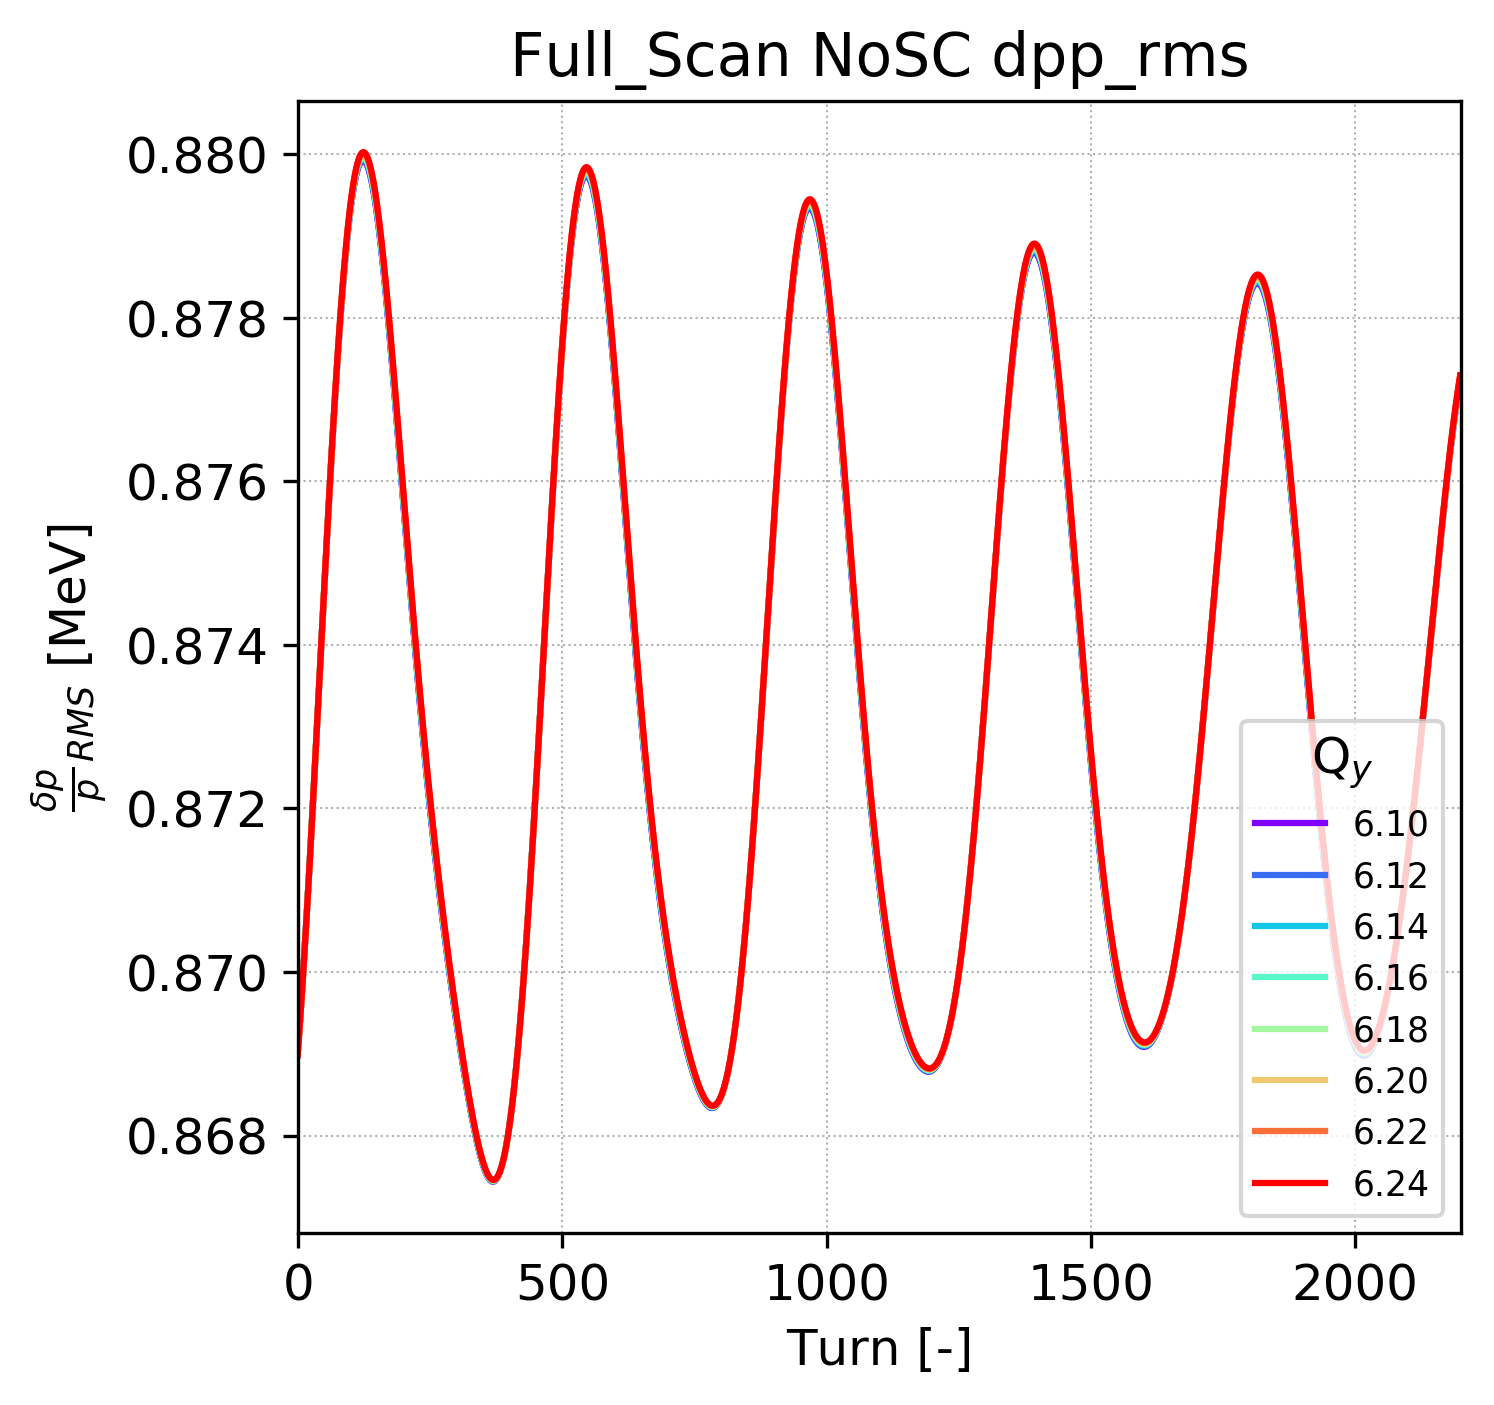

In [21]:
parameter = 'dpp_rms'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\delta p}{p}_{RMS}$ [MeV]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1

ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid(ls=':', lw=0.5)
ax1.set_xlim(0,turn_tot);

savename = save_folder + '/' + Case + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

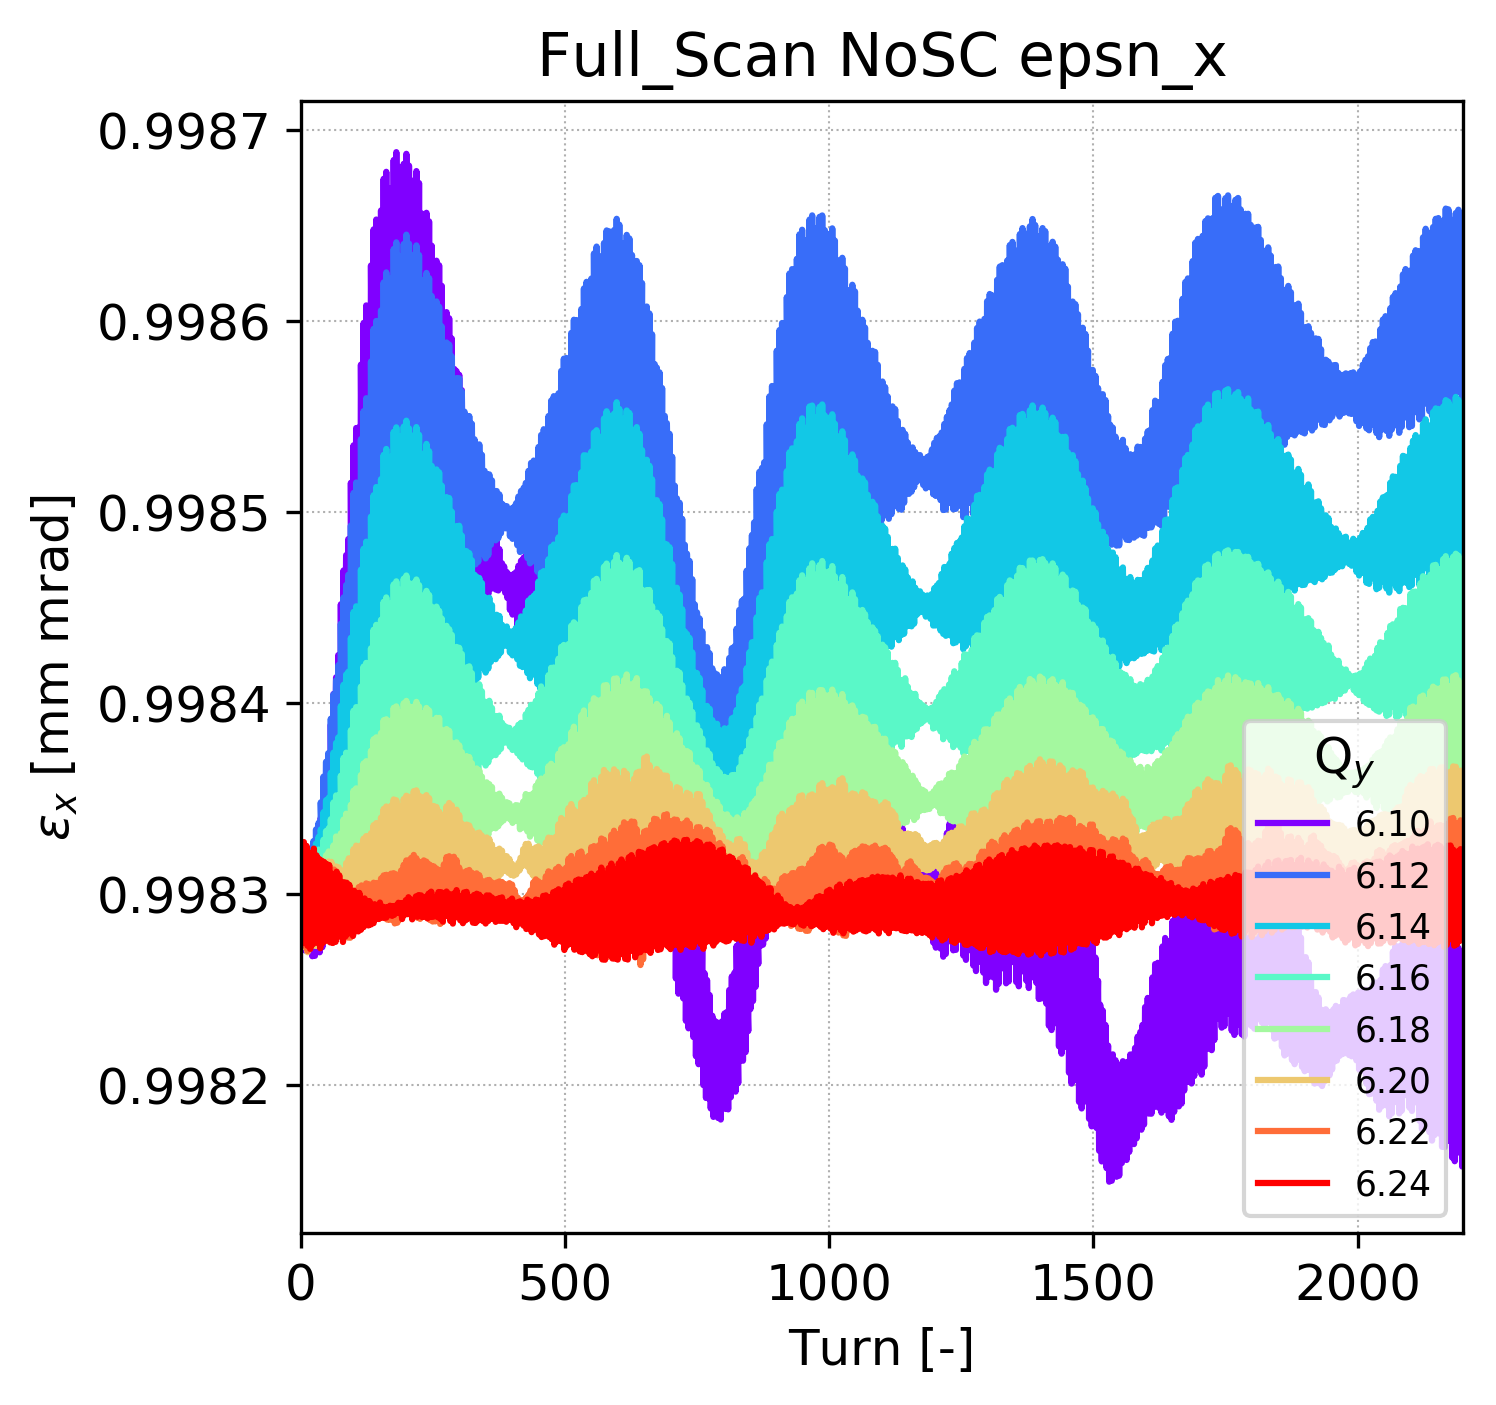

In [22]:
parameter = 'epsn_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid(ls=':', lw=0.5)
ax1.set_xlim(0,turn_tot);

savename = save_folder + '/' + Case + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

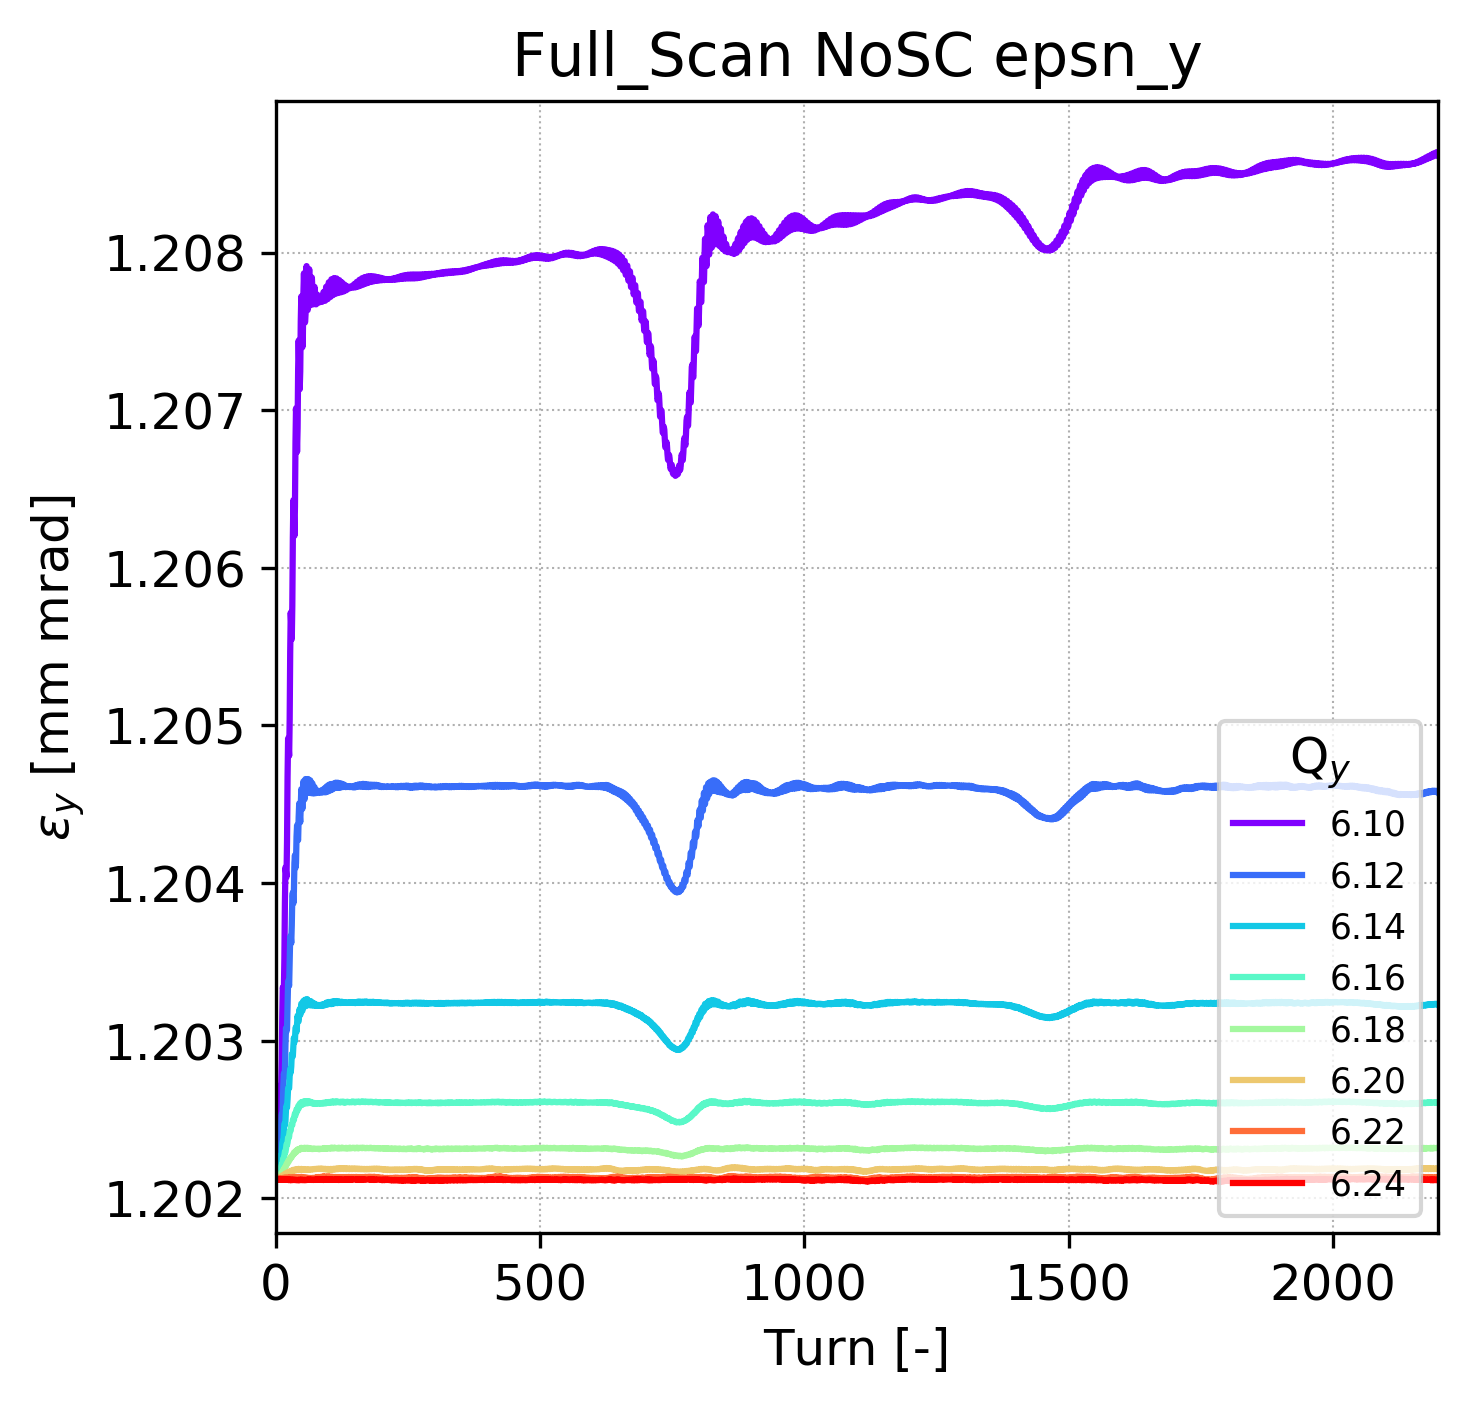

In [24]:
parameter = 'epsn_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid(ls=':', lw=0.5)
ax1.set_xlim(0,turn_tot);

savename = save_folder + '/' + Case + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

In [36]:
tunes = []
final_emittances = []
initial_emittances = []

for key, value in sorted(dd1.iteritems()):
    tunes.append(key)
    initial_emittances.append(dd1[key]['epsn_y'][0][0])
    final_emittances.append(np.mean(dd1[key]['epsn_y'][0][(874-250):(874+250)]))

print tunes
print initial_emittances
print final_emittances

['6.10', '6.12', '6.14', '6.16', '6.18', '6.20', '6.22', '6.24']
[1.2021175072387468e-06, 1.2021175072387468e-06, 1.2021175072387468e-06, 1.2021175072387468e-06, 1.2021175072387468e-06, 1.2021175072387468e-06, 1.2021175072387468e-06, 1.2021175072387468e-06]
[1.2078614041800808e-06, 1.2044914021533865e-06, 1.2031866229830734e-06, 1.2025860282687041e-06, 1.2023079633479127e-06, 1.202181724431932e-06, 1.2021311251492028e-06, 1.2021174711007381e-06]


In [ ]:
parameter = 'epsn_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid(ls=':', lw=0.5)
ax1.set_xlim(0,turn_tot);

savename = save_folder + '/' + Case + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);